# Summarized all Sex difference analysis



In [1]:
from datetime import datetime; print("START:", datetime.now())
import socket; print("Simons Foundation, Rusty HPC,", socket.gethostname())

START: 2021-08-24 12:34:18.904517
Simons Foundation, Rusty HPC, worker3142


In [2]:
%cd /mnt/home/zzhang/ceph/jemm
%load_ext rpy2.ipython

/mnt/ceph/users/zzhang/jemm


## 1. Read in Data

In [3]:
from jemm.meta_loader import MetaLoader
from jemm.genomic_annotation import ExonSet
from jemm.covariate import Contrasts, Covariate
from jemm.model import JointExonModel
from jemm.plots import beta_barplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict, Counter
import pickle
import os
import scipy.stats as ss
plt.style.use(['science', 'no-latex'])


DATA_VER = 'data-V9'
PCS_TO_INCL = '""'
USE_RE = True

FIGDIR = '%s/all_genes_splicing.gender/figs' % DATA_VER
os.makedirs(FIGDIR, exist_ok=True)

%run ./notebook/navy_utils_sexDiff.py $DATA_VER $PCS_TO_INCL $USE_RE

navy_utils_sexDiff.py data-V9 [] True


In [4]:
f_reg_tables = {
    'SE': './%s/sex_stratified.SE/female.SE.reg_table.tsv'% DATA_VER,
    'A5SS': './%s/sex_stratified.A5SS/female.A5SS.reg_table.tsv'% DATA_VER,
    'A3SS': './%s/sex_stratified.A3SS/female.A3SS.reg_table.tsv'% DATA_VER,
    'RI': './%s/sex_stratified.RI/female.RI.reg_table.tsv'% DATA_VER
}

covs_f = Covariate(fp="./%s/charm_master.no_seropos.csv" % DATA_VER, sep=",", 
                 index_col=0,
                 contrasts=contrasts + Contrasts(name="Sex", levels= ['F']),
                 main_effects=['final', 'plateNum', 'pid'] + PCS_TO_INCL if USE_RE is True \
                   else ['final', 'plateNum'] + PCS_TO_INCL,
                 verbose=True)

In [5]:
# Will also need to load the joint analysis results


contrast_cols = ['final@Pre', 'final@First', 'final@Mid', 'final@Post', 
                 'final@False Negative','final@Immune', 'final@Reinfection',
                 ]

foo_data_files = {
    'SE': {'jct': None, 'txr': None}, 
    'A5SS': {'jct': None, 'txr': None},
    'A3SS': {'jct': None, 'txr': None},
    'RI': {'jct': None, 'txr': None},
}
metaloader_f = MetaLoader(covs_f, foo_data_files, f_reg_tables,
                        jem_type='lmm' if USE_RE else 'lm',
                        jem_kwargs={
                            'diff_intercept_by_measure': True,
                            'group_varname': 'pid',
                            'skip_load': True
                        },
                        verbose=False
                       )

/mnt/ceph/users/zzhang/jemm/jemm/model.py:669: RuntimeWarning: invalid value encountered in true_divide
  chi2_stats = beta_mle ** 2 / mle_var
/mnt/home/zzhang/workspace/programs/anaconda3/envs/rna-seq/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/mnt/home/zzhang/workspace/programs/anaconda3/envs/rna-seq/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/mnt/ceph/users/zzhang/jemm/jemm/model.py:669: RuntimeWarning: invalid value encountered in true_divide
  chi2_stats = beta_mle ** 2 / mle_var
/mnt/home/zzhang/workspace/programs/anaconda3/envs/rna-seq/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/mnt/ceph/users/zzhang/jemm

In [6]:
m_reg_tables = {
    'SE': './%s/sex_stratified.SE/male.SE.reg_table.tsv'% DATA_VER,
    'A5SS': './%s/sex_stratified.A5SS/male.A5SS.reg_table.tsv'% DATA_VER,
    'A3SS': './%s/sex_stratified.A3SS/male.A3SS.reg_table.tsv'% DATA_VER,
    'RI': './%s/sex_stratified.RI/male.RI.reg_table.tsv'% DATA_VER
}

covs_m = Covariate(fp="./%s/charm_master.no_seropos.csv" % DATA_VER, sep=",", 
                 index_col=0,
                 contrasts=contrasts + Contrasts(name="Sex", levels= ['M']),
                 main_effects=['final', 'plateNum', 'pid'] + PCS_TO_INCL if USE_RE is True \
                   else ['final', 'plateNum'] + PCS_TO_INCL,
                 verbose=True)

metaloader_m = MetaLoader(covs_m, foo_data_files, m_reg_tables,
                          jem_type='lmm' if USE_RE else 'lm',
                          jem_kwargs={'diff_intercept_by_measure':True,
                            'group_varname': 'pid',
                            'skip_load':True},
                          verbose=False)

/mnt/home/zzhang/workspace/programs/anaconda3/envs/rna-seq/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/mnt/ceph/users/zzhang/jemm/jemm/model.py:669: RuntimeWarning: invalid value encountered in true_divide
  chi2_stats = beta_mle ** 2 / mle_var
/mnt/home/zzhang/workspace/programs/anaconda3/envs/rna-seq/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/mnt/home/zzhang/workspace/programs/anaconda3/envs/rna-seq/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/mnt/home/zzhang/workspace/programs/anaconda3/envs/rna-seq/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1847: RuntimeWarning: invalid value encountere

In [7]:
jct_dfs = {}
txr_dfs = {}
meta = pd.read_table("./%s/charm_master.no_seropos.csv" % DATA_VER, sep=",", index_col=0)
for as_type in m_reg_tables:
    print(as_type)
    if os.path.isfile("./%s/matrix/%s-JCT.txt"%(DATA_VER, as_type)):
        df1 = pd.read_csv("./%s/matrix/%s-JCT.txt"%(DATA_VER, as_type), index_col=0, sep="\t")
        jct_dfs[as_type] = df1
    else:
        raise Exception('check your matrix folder; results should have been generated by 00-preprocess.ipynb')
    if os.path.isfile("./%s/matrix/%s-TXR.txt"%(DATA_VER, as_type)):
        df2 = pd.read_csv("./%s/matrix/%s-TXR.txt"%(DATA_VER, as_type), index_col=0, sep="\t")
        txr_dfs[as_type] = df2
    else:
        raise Exception('check your matrix folder; results should have been generated by 00-preprocess.ipynb')


SE
A5SS
A3SS
RI


## 2. Get contrasting coefficients for each condition

In [8]:
import numpy as np
import scipy.stats
from jemm.utils import logit, sigmoid, fdr_bh

In [9]:
# test sex differences for each condition
def test_conds(as_type, eid, jct_dfs, txr_dfs, meta):
    jct = jct_dfs[as_type].loc[eid] if eid in jct_dfs[as_type].index else None
    txr = txr_dfs[as_type].loc[eid] if eid in txr_dfs[as_type].index else None 
    test_conds = {
        'control': ['final=="Control" and Sex=="M"', 'final=="Control" and Sex=="F"'],
        'first': ['final=="First" and Sex=="M"', 'final=="First" and Sex=="F"'],
        'mid': ['final=="Mid" and Sex=="M"', 'final=="Mid" and Sex=="F"'],
    }
    res = {}
    for cond in test_conds:
        idx1 = meta.query(test_conds[cond][0]).index
        idx2 = meta.query(test_conds[cond][1]).index
        if jct is None:
            d11 = []
            d12 = []
        else:
            d11 = jct[idx1].to_list()
            d12 = jct[idx2].to_list()
        if txr is None:
            d21 = []
            d22 = []
        else:
            d21 = txr[idx1].to_list()
            d22 = txr[idx2].to_list()
        try:
            if as_type == "SE":
                d1 = d11+d21
                d2 = d12+d22
            else:
                d1 = d21
                d2 = d22
            pval = ss.mannwhitneyu(d11+d21, d12+d22)[1]
        except:
            pval = 1
        res.update(
        {
            '%s.avg.diff'%cond: np.nanmean(d1) - np.nanmean(d2),
            '%s.pvalue'%cond: pval
        })

    return res

In [10]:
test_conds('SE', 'chr1:+:198699704:198702386:198702530:198703297', jct_dfs, txr_dfs, meta)

{'control.avg.diff': 0.03421645418496572,
 'control.pvalue': 0.00024399013561248324,
 'first.avg.diff': 0.019487931034482764,
 'first.pvalue': 0.1412519734141519,
 'mid.avg.diff': -0.002400865058962809,
 'mid.pvalue': 0.3626070524445627}

In [11]:
eids_gender = []
eids_type = []
male_sigs = []
female_sigs = []
male_base = []
female_base = []
male_first = []
male_mid = []
female_first = []
female_mid = []

ctrl_p = []
first_p = []
mid_p = []

male_pc_base = meta.query('Sex=="M"')[PCS_TO_INCL].mean().to_list()
female_pc_base = meta.query('Sex=="F"')[PCS_TO_INCL].mean().to_list()

def get_psi_diff(reg_table, conds, pc_base):
    base = sigmoid(np.dot(reg_table.loc[['intercept']+PCS_TO_INCL, 'coef'], [1]+pc_base))
    psi = [base]
    for cond in conds:
        alt = sigmoid(np.dot(reg_table.loc[['intercept', cond]+PCS_TO_INCL, 'coef'], [1,1]+pc_base))
        psi.append(alt)
    return psi

# NEED TO SIMPLIFY THINGS
# NOW ONLY LOOK AT FIRST/MID DIFFERENCES
for as_type in metaloader_m.data:
    tqdm.write(as_type)
    eids = list(metaloader_m.data[as_type].stats_tests.keys())
    for eid in tqdm(eids):
        if eid not in metaloader_m.data[as_type].stats_tests:
            continue
        if eid not in metaloader_f.data[as_type].stats_tests:
            continue
        male_sig = (metaloader_m.data[as_type].stats_tests[eid].loc[['final@First', 'final@Mid'], 'qvals'] < 0.05).sum()
        female_sig = (metaloader_f.data[as_type].stats_tests[eid].loc[['final@First', 'final@Mid'], 'qvals'] < 0.05).sum()
        
        if male_sig < 1 and female_sig < 1:
            continue
        #if eid in eids_gender:
        #    continue
        
        male_sigs.append(male_sig)
        female_sigs.append(female_sig)
        
        m_psi = get_psi_diff(
            reg_table=metaloader_m.data[as_type].stats_tests[eid], 
            conds=['final@First','final@Mid'], 
            pc_base=male_pc_base
        )
        male_base.append(m_psi[0])
        male_first.append(m_psi[1])
        male_mid.append(m_psi[2])
        
        f_psi = get_psi_diff(
            reg_table=metaloader_f.data[as_type].stats_tests[eid], 
            conds=['final@First','final@Mid'], 
            pc_base=female_pc_base
        )
        female_base.append(f_psi[0])
        female_first.append(f_psi[1])
        female_mid.append(f_psi[2])


        eids_gender.append(eid)
        eids_type.append(as_type)
        test_res = test_conds(as_type, eid, jct_dfs, txr_dfs, meta)
        ctrl_p.append(test_res['control.pvalue'])
        first_p.append(test_res['first.pvalue'])
        mid_p.append(test_res['mid.pvalue'])



  0%|          | 3/46905 [00:00<29:11, 26.77it/s]

SE


  0%|          | 4/14020 [00:00<06:35, 35.40it/s]

A5SS


  0%|          | 4/15755 [00:00<07:32, 34.82it/s]

A3SS


  0%|          | 4/6360 [00:00<03:03, 34.69it/s]

RI


100%|██████████| 6360/6360 [00:24<00:00, 262.06it/s]


In [12]:
df = pd.DataFrame({
    'eid': eids_gender, 
    'as_type': eids_type,
    'male_sigs': male_sigs,
    'female_sigs': female_sigs,
    'male_base': male_base,
    'female_base': female_base,
    'male_first': male_first,
    'female_first': female_first,
    'male_mid': male_mid,
    'female_mid': female_mid,
    'ctrl_fdr': fdr_bh(ctrl_p),
    'first_fdr': fdr_bh(first_p),
    'mid_fdr': fdr_bh(mid_p)
})
df['gene'] = [metaloader_m._reg_tables[row['as_type']].loc[row['eid'], 'geneSymbol'] for _, row in df.iterrows()]

df['male_first_absdiff'] = (df['male_first'] - df['male_base']).abs()
df['male_mid_absdiff'] = (df['male_mid'] - df['male_base']).abs()
df['male_absdiff'] = df[['male_first_absdiff', 'male_mid_absdiff']].max(axis=1)

df['female_first_absdiff'] = (df['female_first'] - df['female_base']).abs()
df['female_mid_absdiff'] = (df['female_mid'] - df['female_base']).abs()
df['female_absdiff'] = df[['female_first_absdiff', 'female_mid_absdiff']].max(axis=1)

df.index = df.eid
df = df.query('female_absdiff>0.01 or male_absdiff>0.01')
df['sex_dep'] = (df[['ctrl_fdr', 'first_fdr', 'mid_fdr']].min(axis=1) < 0.05)

In [13]:
df['category'] = 'sex_indep'

In [14]:
df.query('sex_dep==False').shape

(2016, 22)

In [15]:
df.head()

,eid,as_type,male_sigs,female_sigs,male_base,female_base,male_first,female_first,male_mid,female_mid,...,mid_fdr,gene,male_first_absdiff,male_mid_absdiff,male_absdiff,female_first_absdiff,female_mid_absdiff,female_absdiff,sex_dep,category
eid,,,,,,,,,,,,,,,,,,,,,
chr14:-:94388663:94388800:94389010:94390456,chr14:-:94388663:94388800:94389010:94390456,SE,2,1,0.460040,0.511016,0.557302,0.587595,0.514773,0.537977,...,0.291099,SERPINA1,0.097262,0.054733,0.097262,0.076579,0.026961,0.076579,False,sex_indep
chr11:+:63903158:63903985:63904147:63904785,chr11:+:63903158:63903985:63904147:63904785,SE,2,2,0.613249,0.613877,0.570460,0.562846,0.579921,0.561967,...,0.377711,MARK2,0.042789,0.033328,0.042789,0.051031,0.051910,0.051910,False,sex_indep
chr6:+:31587318:31587640:31587733:31588562,chr6:+:31587318:31587640:31587733:31588562,SE,2,1,0.211011,0.195033,0.188613,0.179588,0.169380,0.148817,...,0.114125,LST1,0.022399,0.041632,0.041632,0.015445,0.046216,0.046216,False,sex_indep
chr7:+:66948694:66950951:66951135:66953225,chr7:+:66948694:66950951:66951135:66953225,SE,2,0,0.907627,0.901610,0.817828,0.818659,0.881061,0.899104,...,0.004530,TMEM248,0.089799,0.026566,0.089799,0.082951,0.002506,0.082951,True,sex_indep
chr2:-:37122664:37126288:37126411:37135483,chr2:-:37122664:37126288:37126411:37135483,SE,2,1,0.938967,0.940642,0.844452,0.817668,0.910840,0.902163,...,0.266514,EIF2AK2,0.094515,0.028126,0.094515,0.122974,0.038479,0.122974,False,sex_indep


In [16]:
# 926 = 656 female_stronger + 270 female_specific
df.at[df.query('sex_dep==True and female_absdiff>male_absdiff and male_sigs==0').index, 'category'] = 'F_specific'
df.at[df.query('sex_dep==True and female_absdiff>male_absdiff and male_sigs!=0').index, 'category'] = 'F_stronger'
fem_sp = df.query('category=="F_specific"')
fem_st = df.query('category=="F_stronger"')
print(f'{fem_sp.shape[0]+fem_st.shape[0]} = {fem_st.shape[0]} female_stronger + {fem_sp.shape[0]} female_specific')

926 = 656 female_stronger + 270 female_specific


In [17]:
# 625 = 31 male_stronger + 594 male_specific
df.at[df.query('sex_dep==True and female_absdiff<=male_absdiff and female_sigs==0').index, 'category'] = 'M_specific'
df.at[df.query('sex_dep==True and female_absdiff<=male_absdiff and female_sigs!=0').index, 'category'] = 'M_stronger'


mal_sp = df.query('category=="M_specific"')
mal_st = df.query('category=="M_stronger"')
print(f'{mal_sp.shape[0]+mal_st.shape[0]} = {mal_st.shape[0]} male_stronger + {mal_sp.shape[0]} male_specific')

625 = 31 male_stronger + 594 male_specific


In [18]:
# 2016
indep = df.query('sex_dep==False')
print(f'{indep.shape[0]} sex-independent')

2016 sex-independent


# Write out

In [19]:
os.makedirs('./%s/all_genes_splicing.gender/human_readable'%DATA_VER, exist_ok=True)

with open('./%s/all_genes_splicing.gender/human_readable/female_specific_genes.2.txt'%DATA_VER, 'w') as f:
    f.write('\n'.join(fem_sp['gene'].dropna().unique()))
    f.write('\n')

with open('./%s/all_genes_splicing.gender/human_readable/female_stronger_genes.2.txt'%DATA_VER, 'w') as f:
    f.write('\n'.join(fem_st['gene'].dropna().unique()))
    f.write('\n')


with open('./%s/all_genes_splicing.gender/human_readable/male_specific_genes.2.txt'%DATA_VER, 'w') as f:
    f.write('\n'.join(mal_sp['gene'].dropna().unique()))
    f.write('\n')

with open('./%s/all_genes_splicing.gender/human_readable/male_stronger_genes.2.txt'%DATA_VER, 'w') as f:
    f.write('\n'.join(mal_st['gene'].dropna().unique()))
    f.write('\n')
    
with open('./%s/all_genes_splicing.gender/human_readable/same_genes.2.txt'%DATA_VER, 'w') as f:
    f.write('\n'.join(indep['gene'].dropna().unique()))
    f.write('\n')

In [20]:
mal = {g:'Male-Specific' for g in mal_sp['gene'].dropna().unique()}
mal.update({g:'Male-Stronger' for g in mal_st['gene'].dropna().unique() if g not in mal})
mal.update({g:'Indep' for g in indep['gene'].dropna().unique() if g not in mal})

mal = pd.DataFrame.from_dict(mal, orient="index", columns=['type'])
mal.to_csv('./%s/all_genes_splicing.gender/human_readable/male_hb.txt'%DATA_VER, sep="\t")

In [21]:
fem = {g:'Female-Specific' for g in fem_sp['gene'].dropna().unique()}
fem.update({g:'Female-Stronger' for g in fem_st['gene'].dropna().unique() if g not in fem})
fem.update({g:'Indep' for g in indep['gene'].dropna().unique() if g not in fem})

fem = pd.DataFrame.from_dict(fem, orient="index", columns=['type'])
fem.to_csv('./%s/all_genes_splicing.gender/human_readable/female_hb.txt'%DATA_VER, sep="\t")

In [22]:
df = df[
    ['eid',
     'as_type',
     'gene', 
     'category',
     'male_sigs',
     'female_sigs',
     'male_base',
     'female_base',
     'male_first',
     'female_first',
     'male_mid',
     'female_mid',
     'ctrl_fdr',
     'first_fdr',
     'mid_fdr',
     'male_absdiff',
     'female_absdiff',
     'sex_dep']].to_csv('./%s/all_genes_splicing.gender/df.txt'%DATA_VER, sep="\t", index=False)

# Example plot

In [23]:
fem_sp.loc['chr1:+:198699704:198702386:198702530:198703297']

eid                     chr1:+:198699704:198702386:198702530:198703297
as_type                                                             SE
male_sigs                                                            0
female_sigs                                                          1
male_base                                                       0.4631
female_base                                                   0.449703
male_first                                                    0.453297
female_first                                                  0.493843
male_mid                                                      0.461929
female_mid                                                    0.530186
ctrl_fdr                                                    0.00852102
first_fdr                                                      0.27182
mid_fdr                                                       0.413436
gene                                                             PTPRC
male_f

In [24]:
def fdr_to_stars(value):
    if value < 0.001:
        return '****'
    elif value < 0.01:
        return '**'
    elif value < 0.05:
        return '*'
    elif value < 0.1:
        return '.'
    else:
        return 'n.s.'

def plot_sig_stars(mhtdf, ax, y_border_anchor, h=0.05):
    collocs = {'Control':-0.32, 'Pre':-0.16, 'First':0, 'Mid':0.16, 'Post':0.32}
    sigvalues = []
    for row in mhtdf:
        if row['sex'] == 'M':
            sigvalues.append({'x1':0.68, 'x2':1+collocs[row['annotation']], 'text': fdr_to_stars(row['fdr']), 'loc': 'top' })
        elif row['sex'] == 'F':
            sigvalues.append({'x1':-0.32, 'x2':collocs[row['annotation']], 'text': fdr_to_stars(row['fdr']), 'loc': 'top' })
    ## after plotting
    for i, row in enumerate(sigvalues):
        x1, x2 = row['x1'], row['x2']
        if row['loc'] == 'top':
            #y, col = ax.get_ylim()[-1] + .05*(i+1), 'k'
            y = y_border_anchor + .05*(i+1)
            col = 'k'
        else:
            #y, col = ax.get_ylim()[0] -.05*(i+1), -0.05, 'k'
            y = y_border_anchor - .05*(i+1)
            col = 'k'
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        ax.text((x1+x2)*.5, y+h, row['text'], ha='center', va='bottom', color=col)

In [25]:
def plot_psi(eid, as_type, genename, psi_to_use='txr'):
    try:
        psi_jct = jct_dfs[as_type].loc[eid]
    except:
        psi_jct = None
    try:
        psi_txr = txr_dfs[as_type].loc[eid]
    except:
        psi_txr = None
    if psi_to_use == 'jct':
        psi_to_use = psi_jct
    else:
        psi_to_use = psi_txr
    df = covs.meta.loc[[i for i in covs.meta.index if i in psi_to_use], ['final', 'Sex']]
    if psi_jct is not None:
        df['%s_%s_jct' % (genename, as_type)] = [psi_jct.loc[i] for i in df.index]
    if psi_txr is not None:
        df['%s_%s_txr' % (genename, as_type)] = [psi_txr.loc[i] for i in df.index]
    df['%s_%s_use' % (genename, as_type)] = [psi_to_use.loc[i] for i in df.index]
    df = df.loc[df['final'].isin(['Control', 'Pre', 'First', 'Mid', 'Post'])]
    if as_type == 'SE' and psi_jct is not None and psi_txr is not None:
        try:
            fig, axs = plt.subplots(1, 2, figsize=(8,4))

            sns.boxplot(x='Sex', y='%s_%s_jct' % (genename, as_type), hue='final', data=df, showmeans=True, ax=axs[0],
                        order=['F', 'M'],
                        hue_order=['Control', 'First', 'Mid'],
                        showfliers=False,
                        meanprops={"marker": 'o', "markerfacecolor":"white", "markeredgecolor": "black"}
                       )
            axs[0].legend().remove()
            axs = axs[1]

        except Exception as e:
            print("didn't plot jct-se due to %s" % e)
            plt.close()
            fig, axs = plt.subplots(1, 1, figsize=(4,4))
    else:
        fig, axs = plt.subplots(1, 1, figsize=(4,4))



    sns.boxplot(x='Sex', y='%s_%s_use' % (genename, as_type), hue='final', data=df, showmeans=True, ax=axs,
               order=['F', 'M'],
               hue_order=['Control', 'First', 'Mid'],
               showfliers=False,
               meanprops={"marker": 'o', "markerfacecolor":"white", "markeredgecolor": "black"}
               )

    axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.suptitle('%s %s\n%s'%(genename, as_type, eid))
    return psi_jct

chr1:+:198699704:198702386:198702530:198703297 SE PTPRC


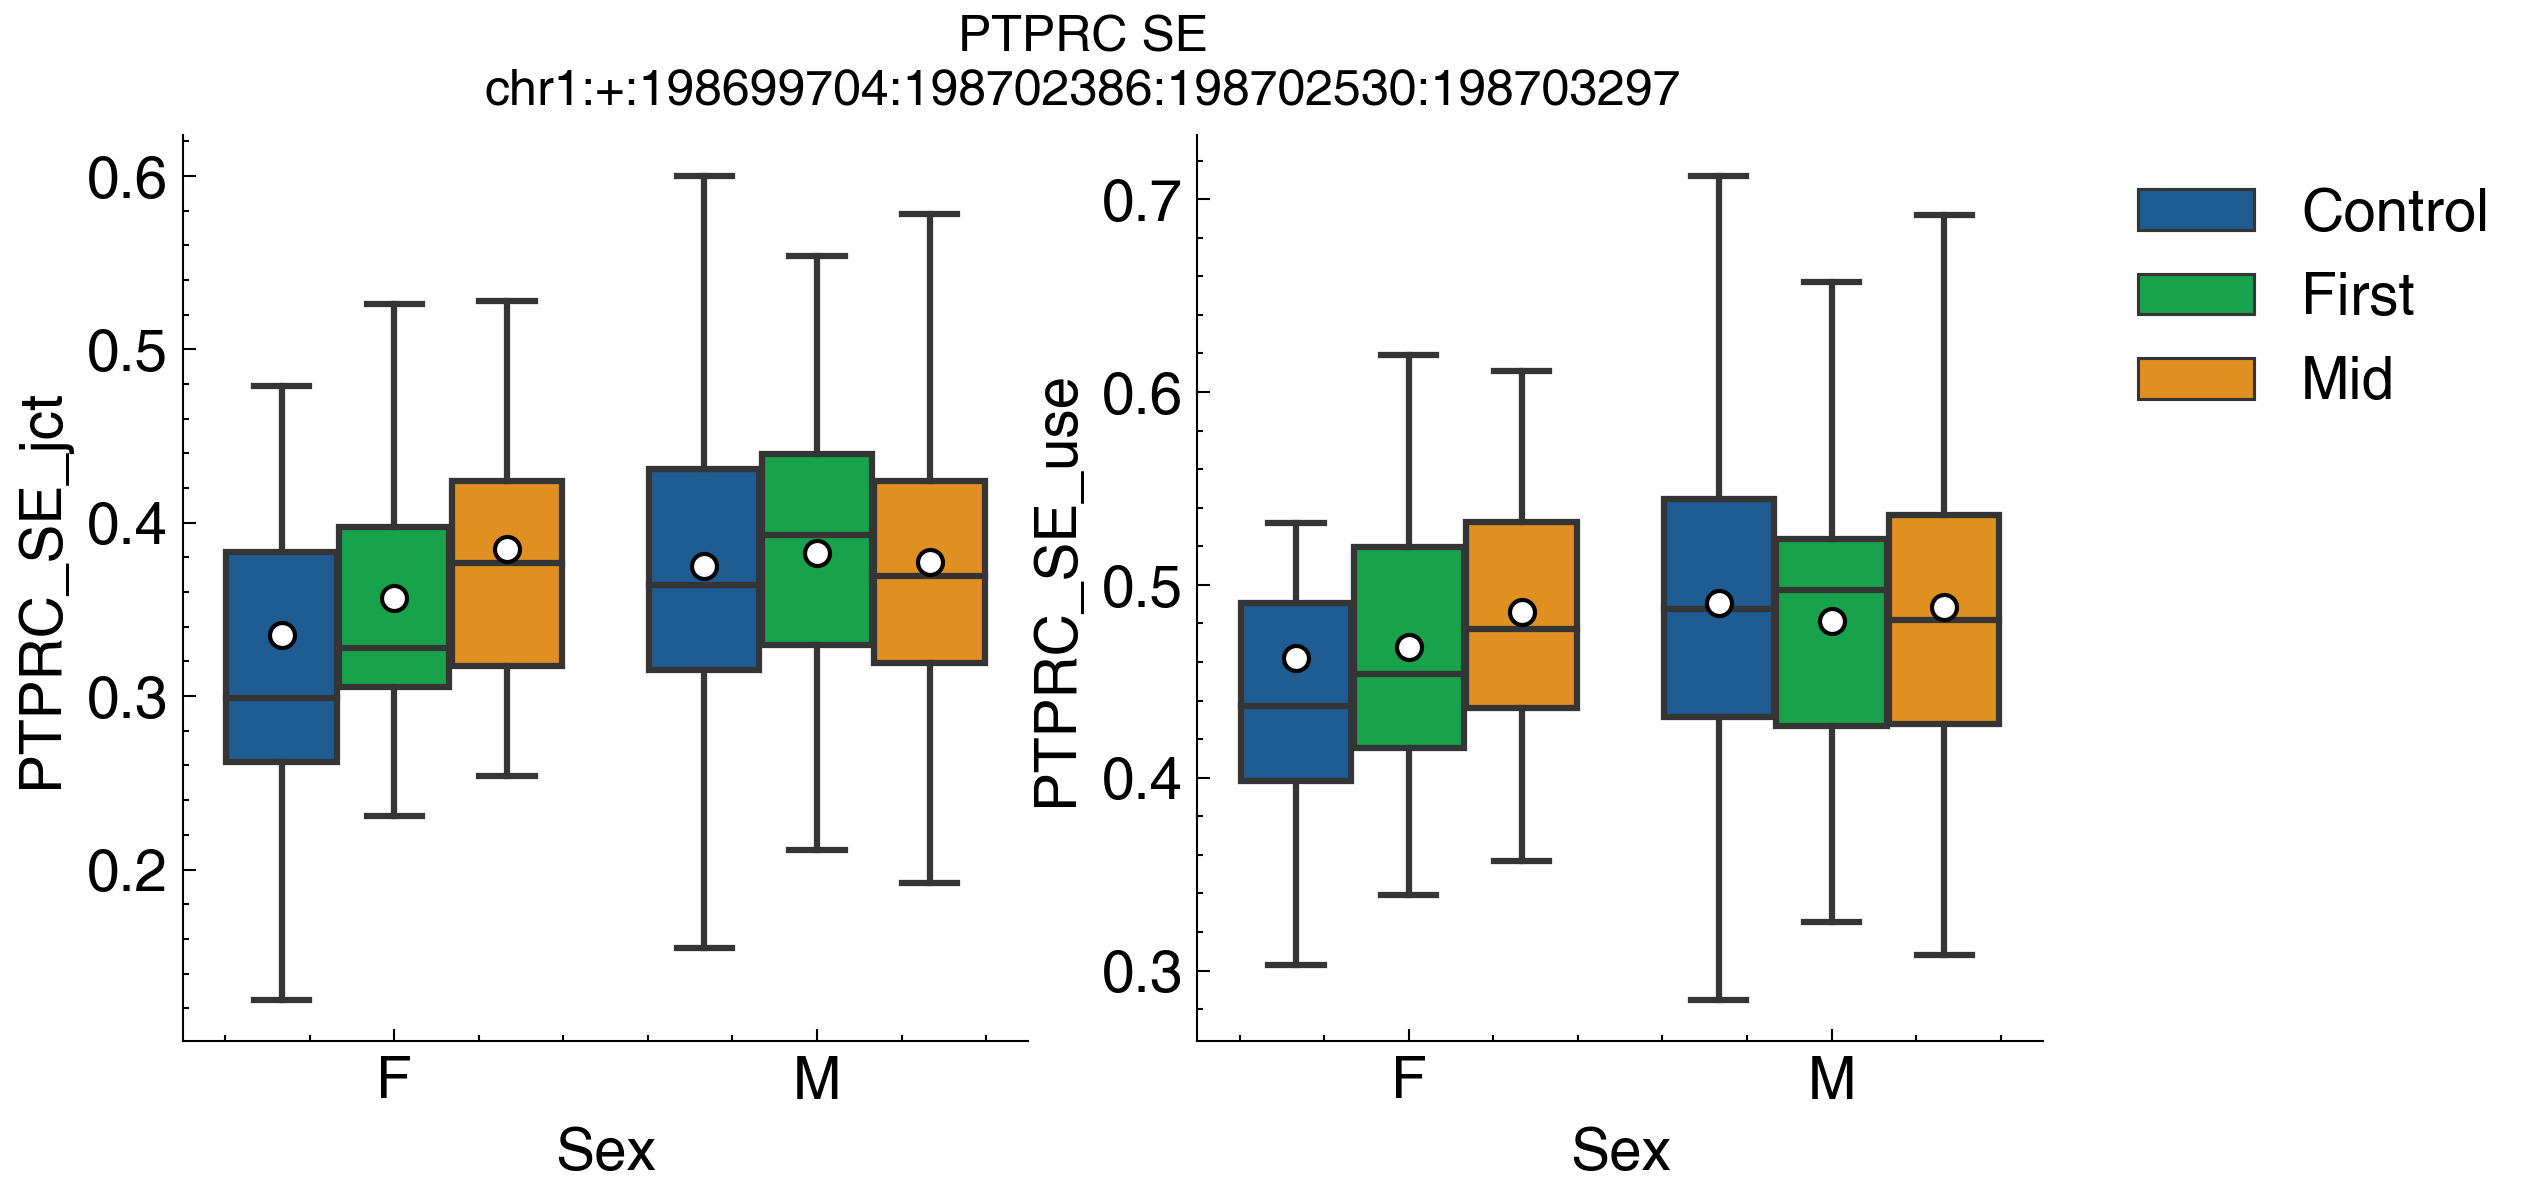

In [26]:
genename = 'PTPRC'
plot_df = fem_sp[fem_sp.gene==genename][['eid', 'as_type']]
eid, as_type = plot_df.iloc[1].to_list()
print(eid, as_type, genename)
psi_jct = plot_psi(eid, as_type, genename)

In [46]:
metaloader_f.data['SE'].stats_tests['chr1:+:198699704:198702386:198702530:198703297']

,coef,var,chi2.wald,pvals,qvals
intercept,-0.20187,0.00452,9.015818,2.676531e-03,0.003165
final@First,0.17724,0.00379,8.288659,3.989344e-03,0.185718
final@Mid,0.32276,0.00330,31.567884,1.925885e-08,0.000038
plateNum@P3,0.02033,0.01027,0.040244,8.410037e-01,1.000000
plateNum@P5,-0.19479,0.00704,5.389651,2.025652e-02,0.613469
plateNum@P6,-0.09002,0.00821,0.987040,3.204668e-01,1.000000
plateNum@P7,-0.18098,0.01204,2.720412,9.907244e-02,1.000000
plateNum@P8,-0.35884,0.01111,11.590112,6.630341e-04,0.119667
plateNum@P10,0.71741,0.02787,18.467065,1.728659e-05,0.001047
plateNum@P13,-0.07215,0.01567,0.332203,5.643647e-01,1.000000


In [27]:
target_comps = [covs.factor_conversion['final'][x] for x in ('First', 'Mid')]

mhtdf = []
for row in metaloader_f.data['SE'].stats_tests['chr1:+:198699704:198702386:198702530:198703297'].loc[target_comps].query('qvals<0.05').iterrows():
    mhtdf.append({'sex':'F', 'annotation': row[0].strip('final@'), 'fdr': row[1]['qvals']})
for row in metaloader_m.data['SE'].stats_tests['chr1:+:198699704:198702386:198702530:198703297'].loc[target_comps].query('qvals<0.05').iterrows():
    mhtdf.append({'sex':'M', 'annotation': row[0].strip('final@'), 'fdr': row[1]['qvals']})

#mhtdf = pd.DataFrame(mhtdf)
mhtdf

[{'sex': 'F', 'annotation': 'Mid', 'fdr': 3.765586399495646e-05}]

(0.25, 0.45)


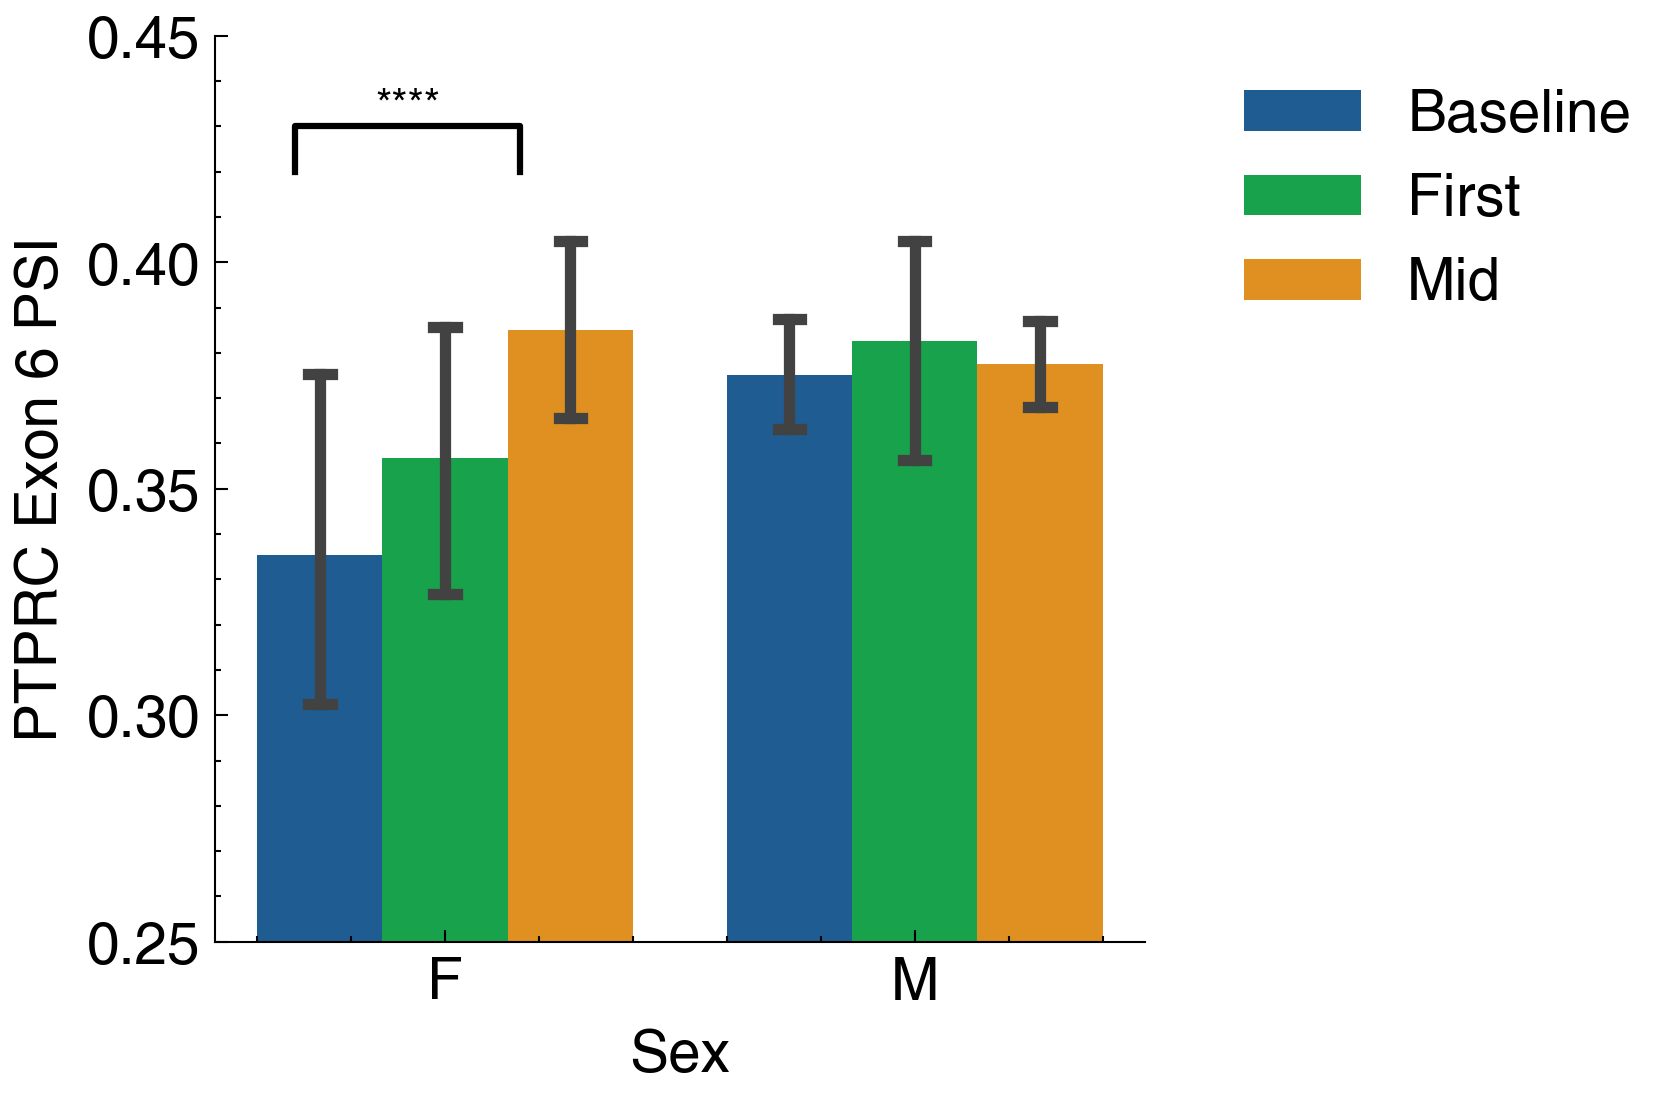

In [28]:
eid = psi_jct.name
plot_df = covs.meta.loc[[i for i in covs.meta.index if i in psi_jct], ['final', 'Sex']]
plot_df['%s_%s_jct' % (genename, as_type)] = [psi_jct.loc[i] for i in plot_df.index]
plt.gca().set_prop_cycle(None)
ax = sns.barplot(
    y='PTPRC_SE_jct', 
    x='Sex', 
    order=['F', 'M'],
    hue='final',
    hue_order=['Control', 'First', 'Mid'],
    capsize=0.05,
    data=plot_df[plot_df.final.isin(('Control', 'First', 'Mid'))],
    #palette=['lightgreen', 'lightcoral', 'wheat', 'lightsteelblue']
)



ax.set_ylim((0.25, 0.45))
ax.set_ylabel(r'PTPRC Exon 6 PSI')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left').get_texts()[0].set_text('Baseline')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plot_sig_stars(mhtdf, ax, y_border_anchor=0.37, h=0.01)
print(ax.get_ylim())
plt.savefig('%s/all_genes_splicing.gender/figs/04-PTPRC_bar.pdf' % (DATA_VER))

In [51]:
# number in MS

print(plot_df.groupby(['final','Sex']).agg('mean'))
print(plot_df.groupby(['final','Sex']).agg('std'))


             PTPRC_SE_jct
final   Sex              
Control F        0.335468
        M        0.375092
First   F        0.356867
        M        0.382552
Mid     F        0.385095
        M        0.377625
             PTPRC_SE_jct
final   Sex              
Control F        0.130299
        M        0.097584
First   F        0.084697
        M        0.098486
Mid     F        0.078757
        M        0.092169


# Cell Type estimates

In [29]:
plier_df = pd.read_csv('./data/PLIER_v9.B.tsv', sep="\t")
plier_df.rename(columns={x:x.split('_P')[0] for x in plier_df.columns}, inplace=True)
plier_df

,20_0001-T00,20_0002-T00,20_0002-T28,20_0003-T00,20_0003-T28,20_0004-T00,20_0005-T00,20_0005-T28,20_0006-T00,20_0006-T28,...,20_3381-T00,20_3381-T07,20_3381-T10,20_3381-T14,20_3381-T42,20_3381-T49,20_3381-T56,20_3395-T00,20_3395-T46,20_3395-T56
CELL:Treg,0.310112,-0.403455,-0.401310,0.000150,-0.036986,0.418955,0.036894,0.106667,0.119326,0.178378,...,-1.133287,0.017933,-0.087658,-0.133450,0.060726,-0.115511,-0.014031,-0.483895,-0.238421,-0.232542
"2,IRIS_Neutrophil-Resting",-0.101660,-0.008278,0.119041,-0.181492,-0.066488,-0.037950,0.035391,0.159995,-0.057041,-0.412095,...,-1.794439,-0.128392,-0.228798,-0.186226,-0.117928,-0.184297,0.044882,0.302011,0.173456,0.345805
"3,KEGG_RIBOSOME",0.755210,-0.220741,0.001377,-0.917877,0.143282,0.164792,-0.075872,-0.095130,0.630134,-0.977658,...,-7.256249,0.344362,0.279884,0.371928,0.009810,-0.134690,-0.048509,0.156308,-0.311664,0.747340
"4,DMAP_ERY5",-0.134732,-0.148436,-0.037755,0.179675,-0.037152,0.231156,0.253600,0.113412,-0.302132,0.007992,...,1.535662,0.177043,0.157192,0.067230,0.411815,0.070247,0.053310,0.167527,-0.073165,0.245682
"CELL:Macrophage,1",-0.335646,0.404231,0.790688,-0.090117,0.595196,-0.373043,0.016354,0.102241,0.050585,-0.321133,...,-2.184741,-0.334519,-0.207953,0.043721,-0.305008,0.524826,-0.057927,0.220370,1.094969,0.424792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"232,REACTOME_GENERIC_TRANSCRIPTION_PATHWAY",0.145663,0.002715,-0.050076,0.183428,-0.114083,0.138173,-0.045422,-0.090111,0.179101,-0.134829,...,-0.306570,0.128148,0.060002,0.120691,0.010087,0.027061,0.087558,0.000523,-0.112219,-0.137141
"233,xCell:mv Endothelial cells_FANTOM_3",0.082853,-0.021675,0.034464,0.163494,0.041763,0.110692,-0.039981,0.013466,0.068829,0.081498,...,1.454403,-0.216069,-0.122648,-0.005101,-0.291532,-0.404170,-0.379648,0.142068,0.017069,-0.275470
"234,GSE19182_Ifng",-0.107322,-0.002112,0.033928,0.016669,-0.016299,-0.095703,-0.140455,-0.053016,-0.069281,-0.021117,...,0.711225,-0.166617,-0.179751,-0.178202,-0.166865,0.389671,-0.132649,-0.101254,0.883079,-0.206181
LV 235,0.139813,-0.131372,-0.146954,-0.333034,-0.031647,-0.027080,0.036646,-0.022351,0.130210,-0.166055,...,-1.076719,0.260375,0.251503,0.231856,0.173896,0.246589,0.182610,-0.055586,-0.028055,0.043361


In [37]:
#[x for x in plier_df.index if 'CD8T' in x]
#[x for x in plier_df.index if 'B' in x]
[x for x in plier_df.index if 'CD4' in x]

['CELL:CD4T',
 '104,xCell:CD4+ memory T-cells_FANTOM_3',
 '117,xCell:CD4+ Tem_NOVERSHTERN_1',
 '119,xCell:CD4+ Tcm_HPCA_2',
 '157,xCell:CD4+ memory T-cells_FANTOM_3',
 '208,xCell:CD4+ memory T-cells_FANTOM_3',
 '226,xCell:CD4+ Tcm_BLUEPRINT_3',
 '229,IRIS_CD4Tcell-N0']

In [38]:
target_lvs = ['CELL:CD8T', 'CELL:B cells,1', 'CELL:B cells,2', 'CELL:CD4T']
target_conds = ('Control', 'First', 'Mid')
plier_tcell_df = plier_df.loc[
    target_lvs,
    [x for x in meta.index[
        meta.final.isin(target_conds)
    ] if x in plier_df.columns]
].transpose()

plier_tcell_df = plier_tcell_df.join(meta)
plier_tcell_df.shape

(839, 8)

In [39]:
test_res = {}
for target_lv in target_lvs:
    test_res[target_lv] = []
    #for cond in target_conds:
    for cond in ['Control', 'First', 'Mid']:
        res_m = ss.ttest_ind(
            plier_tcell_df.query('Sex=="M" and final=="Control"')[target_lv],
            plier_tcell_df.query('Sex=="M" and final=="%s"' % cond)[target_lv]
        )
        res_f = ss.ttest_ind(
            plier_tcell_df.query('Sex=="F" and final=="Control"')[target_lv],
            plier_tcell_df.query('Sex=="F" and final=="%s"' % cond)[target_lv]
        )
        test_res[target_lv].append((res_f.pvalue, res_m.pvalue))
test_res

{'CELL:CD8T': [(1.0, 1.0),
  (0.6710112382678546, 0.004288093091939036),
  (0.005417519423330488, 9.796886614135398e-06)],
 'CELL:B cells,1': [(1.0, 1.0),
  (0.21009353102049694, 5.721778419686084e-07),
  (0.15000659129117042, 0.0002333298496731774)],
 'CELL:B cells,2': [(1.0, 1.0),
  (0.12644511308239004, 0.03343352798706594),
  (0.3244729506699551, 1.465099038830647e-05)],
 'CELL:CD4T': [(1.0, 1.0),
  (0.20138211677798748, 0.06068523049891272),
  (0.0003713156327350022, 0.0002502476543665573)]}

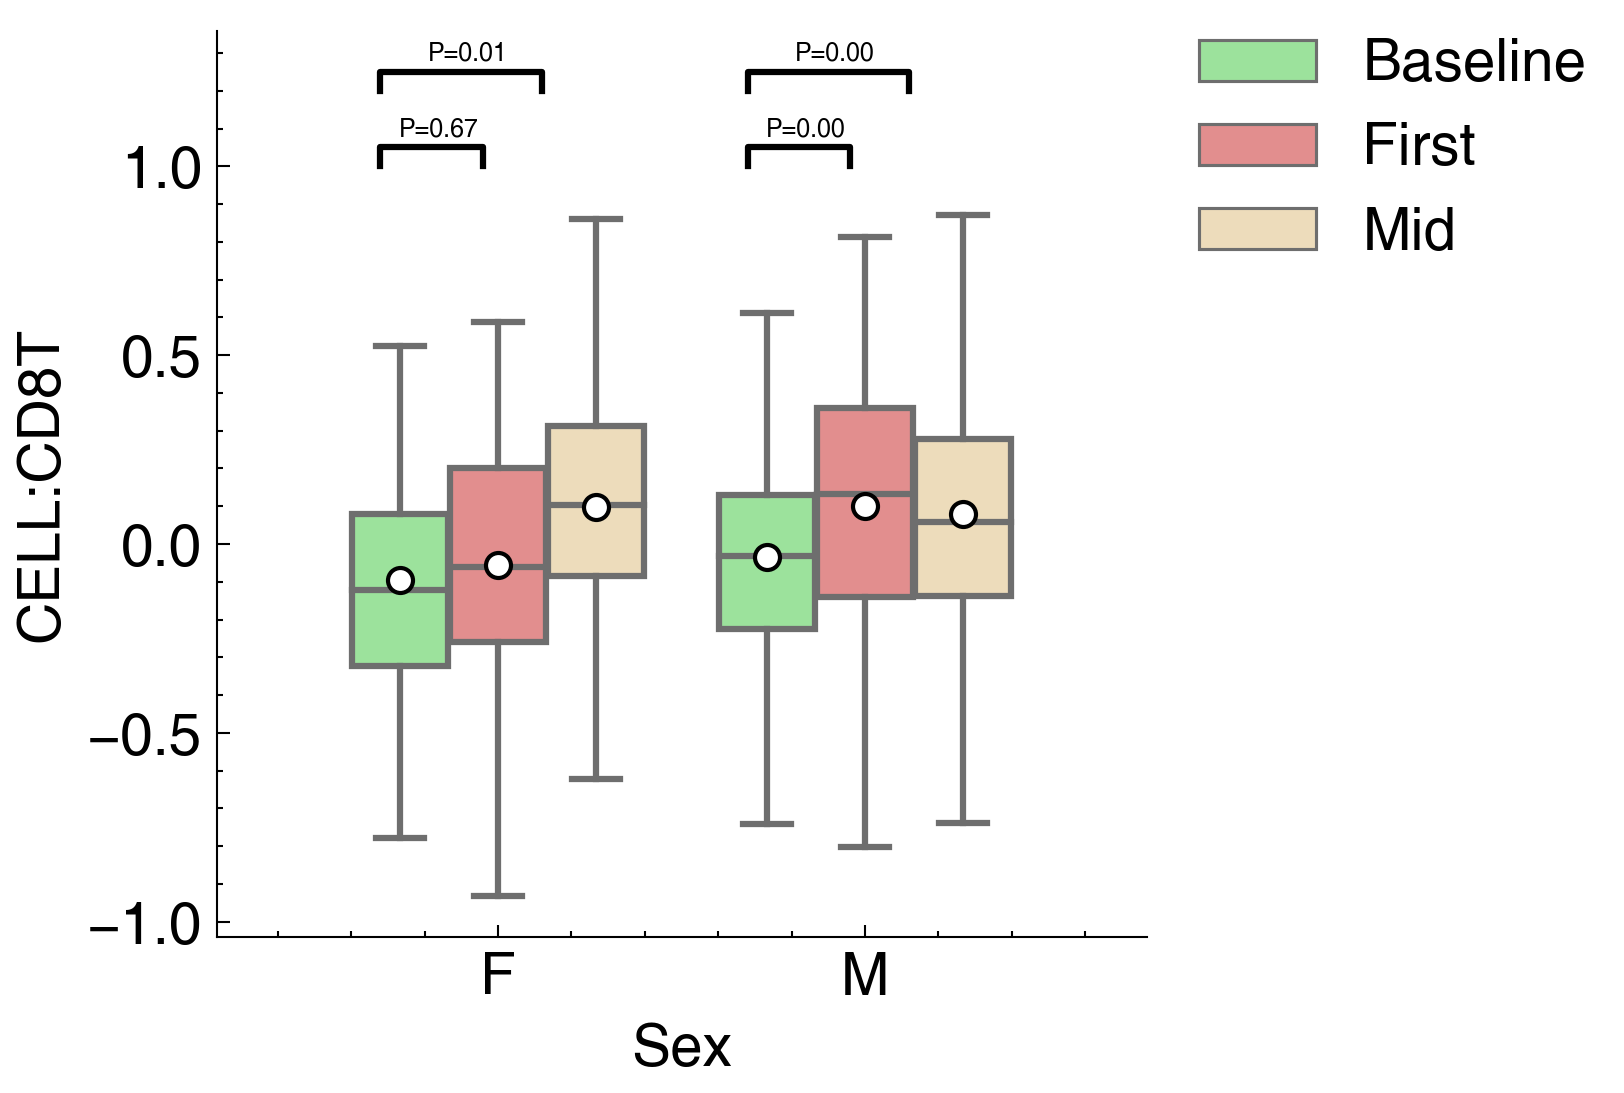

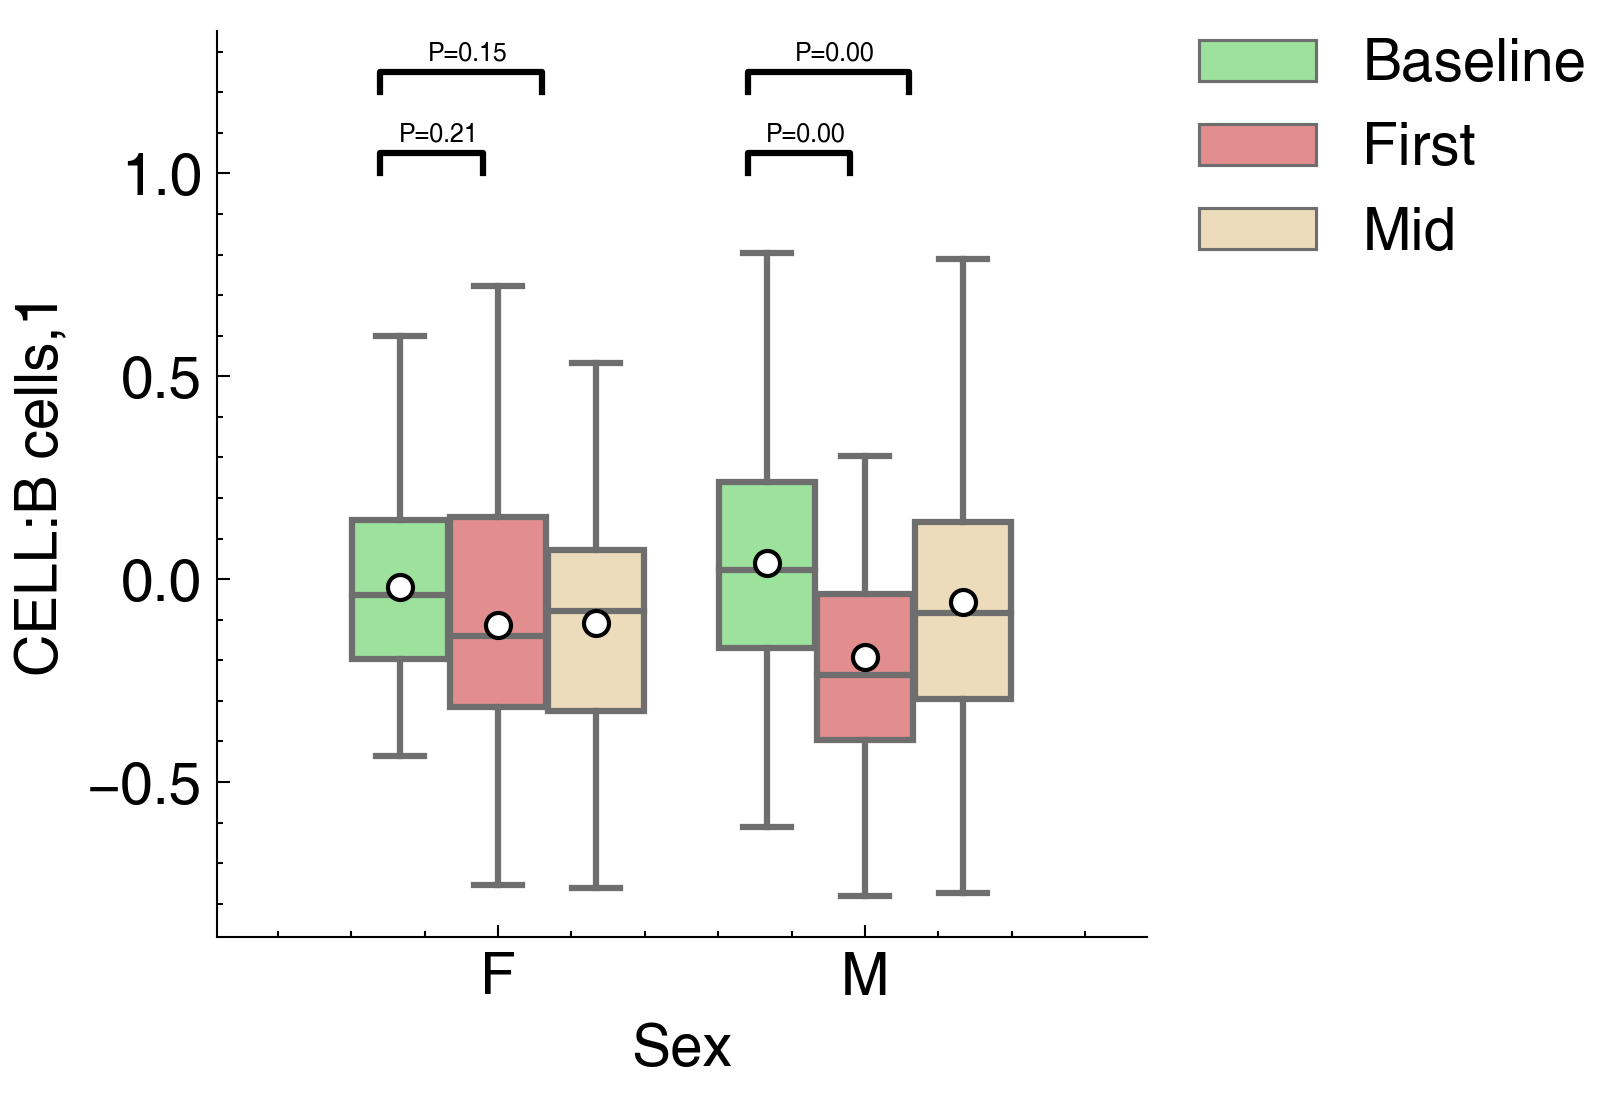

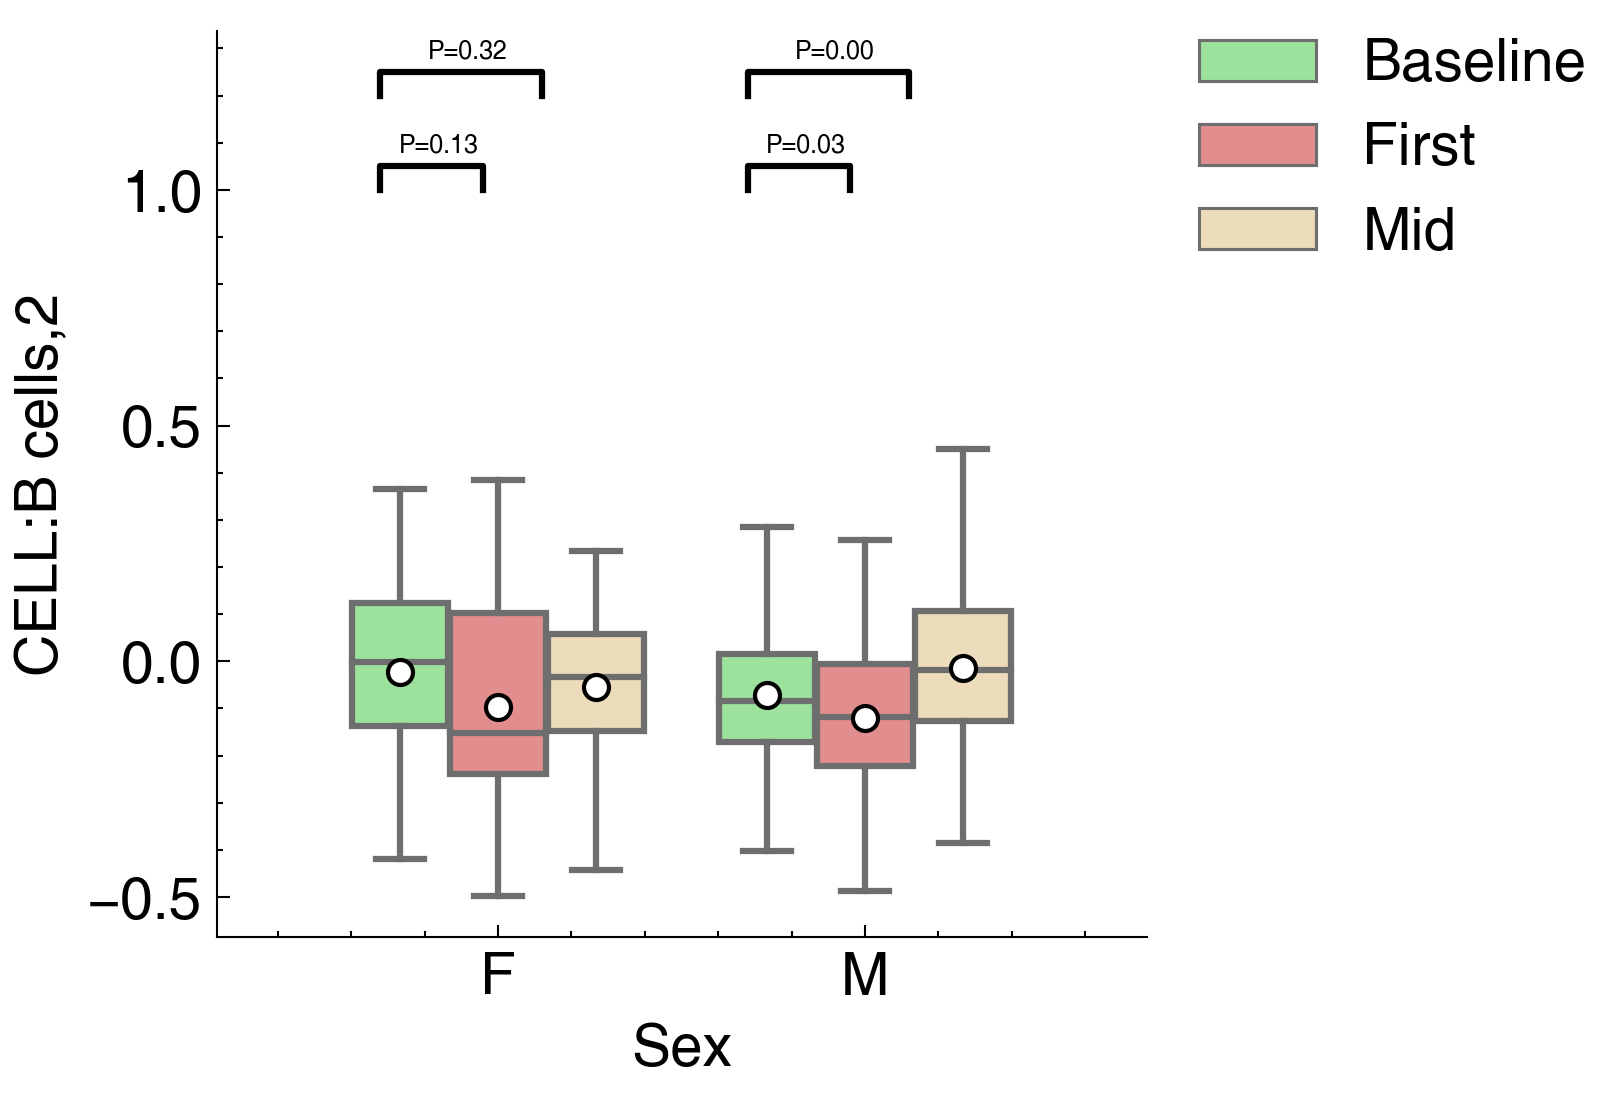

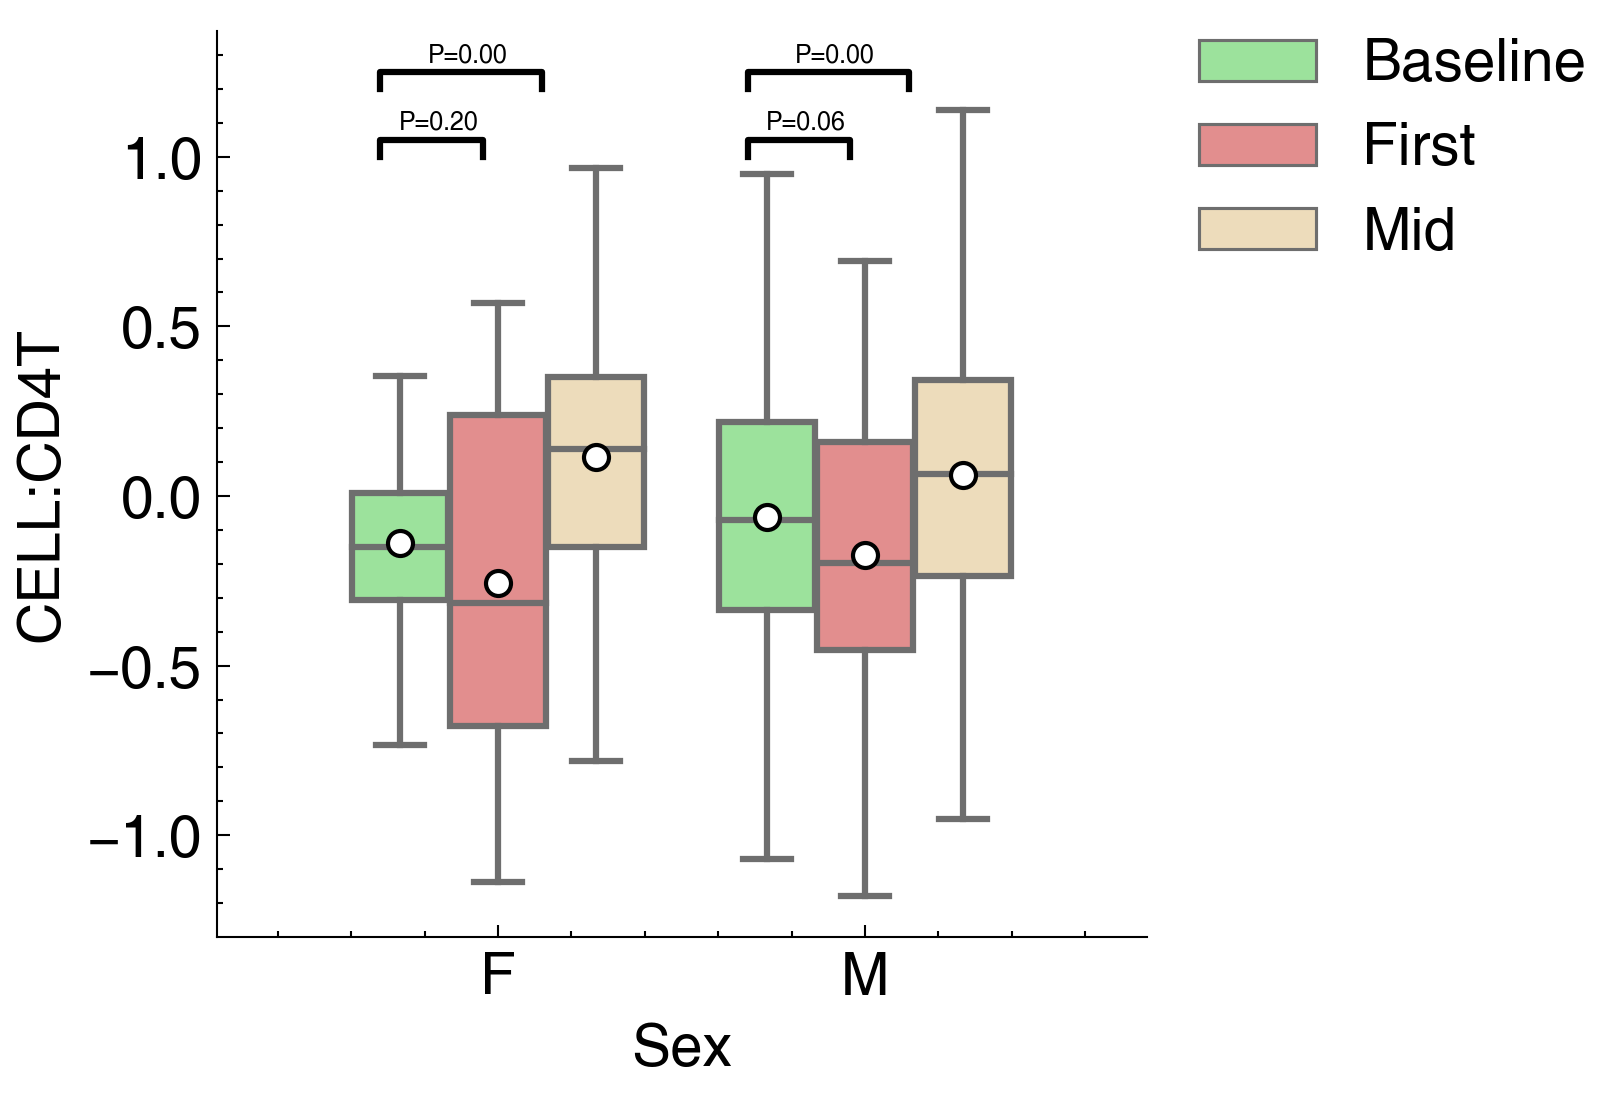

In [40]:
for target_lv in target_lvs:
    fig, ax = plt.subplots(1,1, figsize=(4,4))
    sns.boxplot(x='Sex', y=target_lv, hue='final', data=plier_tcell_df, ax=ax,
                hue_order=['Control', 'First', 'Mid'],
                order=['F', 'M'],
                showmeans=True, meanprops={"marker": 'o', "markerfacecolor":"white", "markeredgecolor": "black"},
                showfliers=False, boxprops=dict(alpha=1),
                palette=['lightgreen', 'lightcoral', 'wheat', 'lightsteelblue']
               )
    #sns.stripplot(x='Sex', y=target_lv, hue='final', data=plier_tcell_df, ax=ax,
    #            order=['F', 'M'],
    #            hue_order=target_conds,
    #            dodge=True, edgecolor='black'
    #           )
    for j, pval_pairs in enumerate(test_res[target_lv]):
        jitter = (j - 2) / 5
        if j==0: continue
        ax.text(x=-0.35+j*0.08, y=0.88+j*0.2, s="P=%.2f" % pval_pairs[0], fontsize=6)
        ax.text(x=0.65+j*0.08, y=0.88+j*0.2, s="P=%.2f" % pval_pairs[1], fontsize=6)
        ax.plot([-0.32, -0.32, -0.2+j*0.16, -0.2+j*0.16], [0.8+j/5, 0.8+j/5+0.05, 0.8+j/5+0.05, 0.8+j/5], lw=1.5, c='black', ls='-')
        ax.plot([-0.32+1, -0.32+1, -0.2+j*0.16+1, -0.2+j*0.16+1], [0.8+j/5, 0.8+j/5+0.05, 0.8+j/5+0.05, 0.8+j/5], lw=1.5, c='black', ls='-')

    ax.legend(loc='upper left', bbox_to_anchor=(1,1.05)).get_texts()[0].set_text('Baseline')
    fig.savefig('%s/all_genes_splicing.gender/figs/05-PLIER_%s.pdf' % (DATA_VER, target_lv))

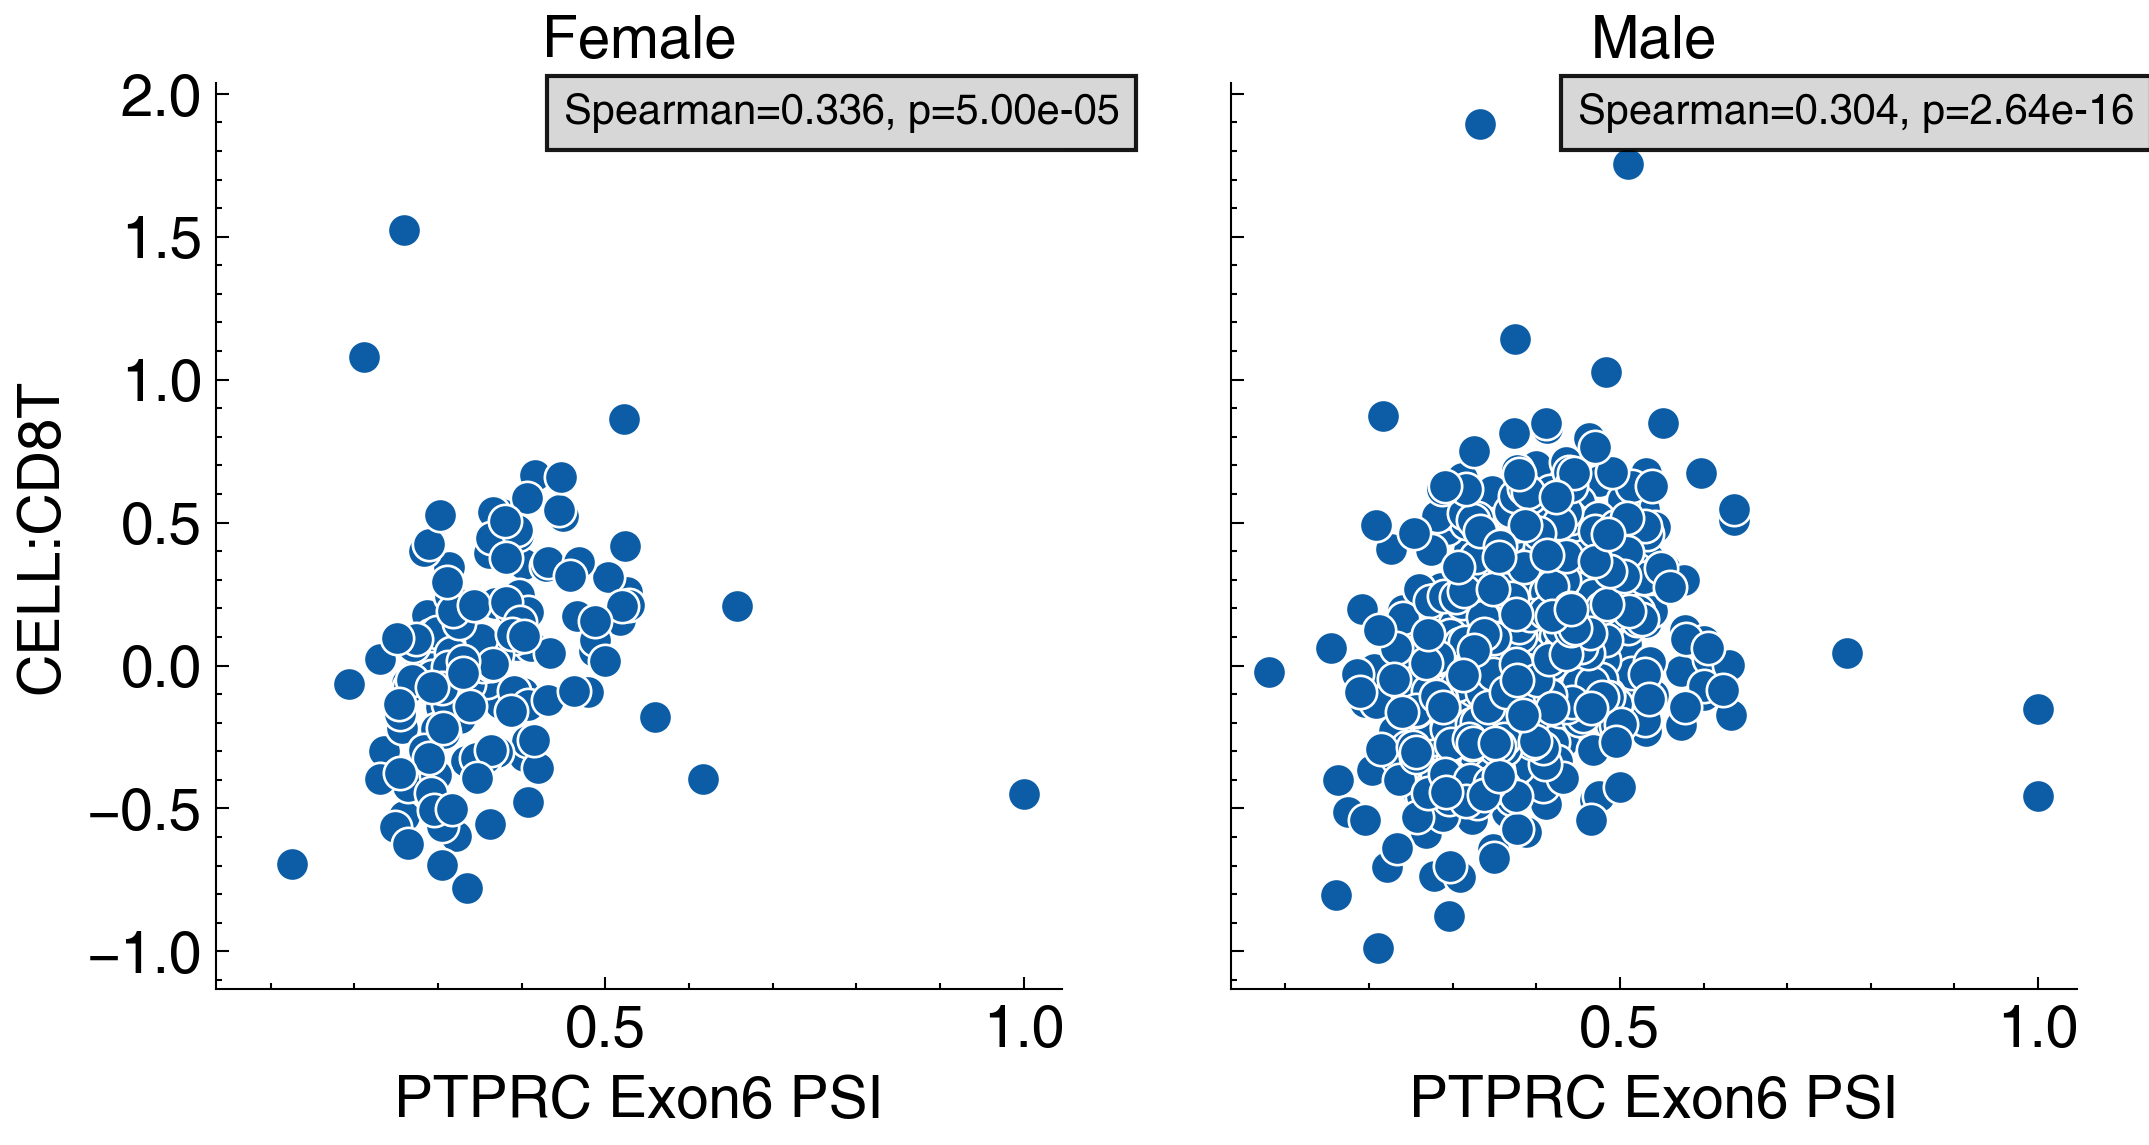

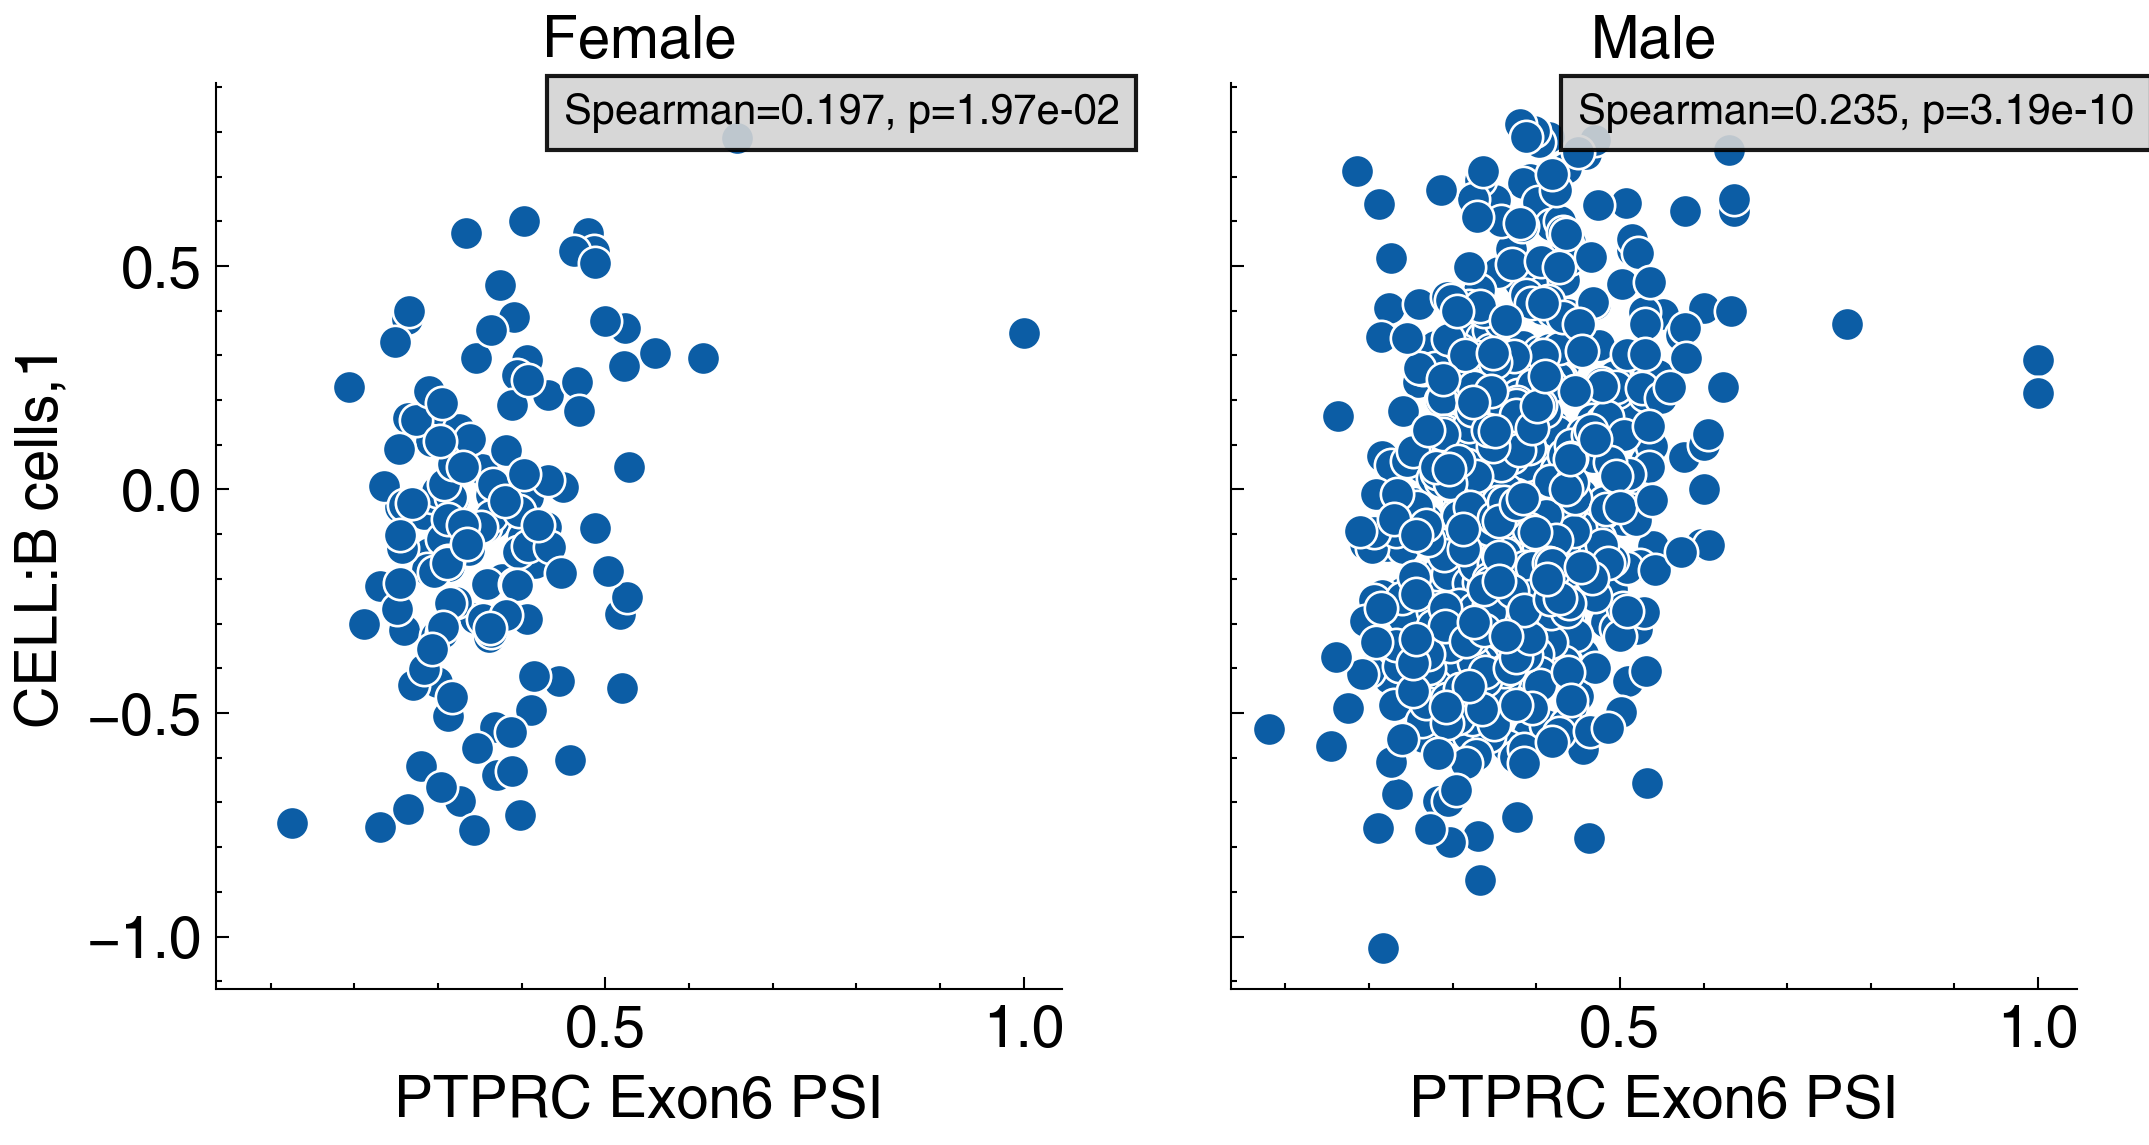

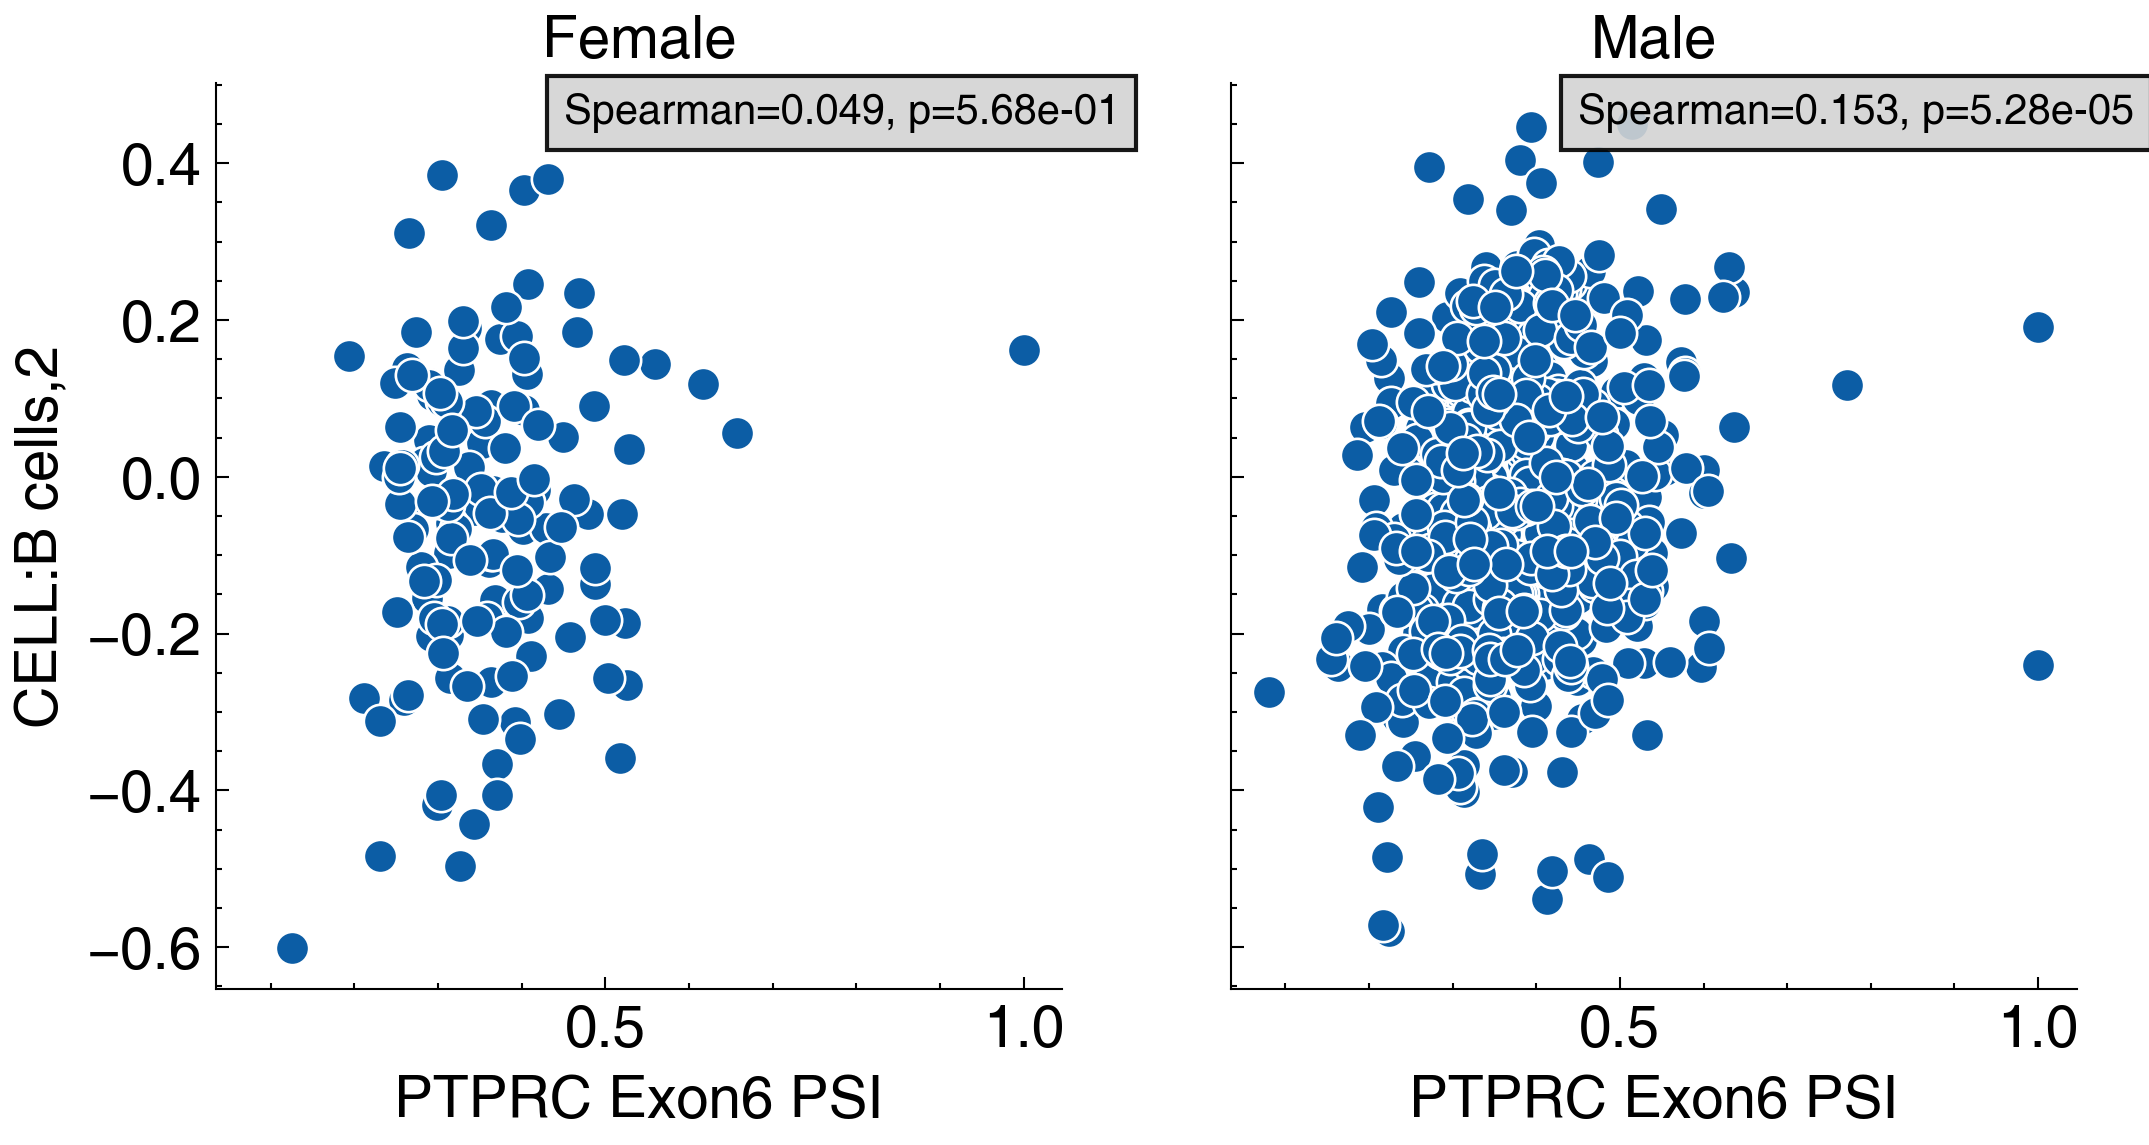

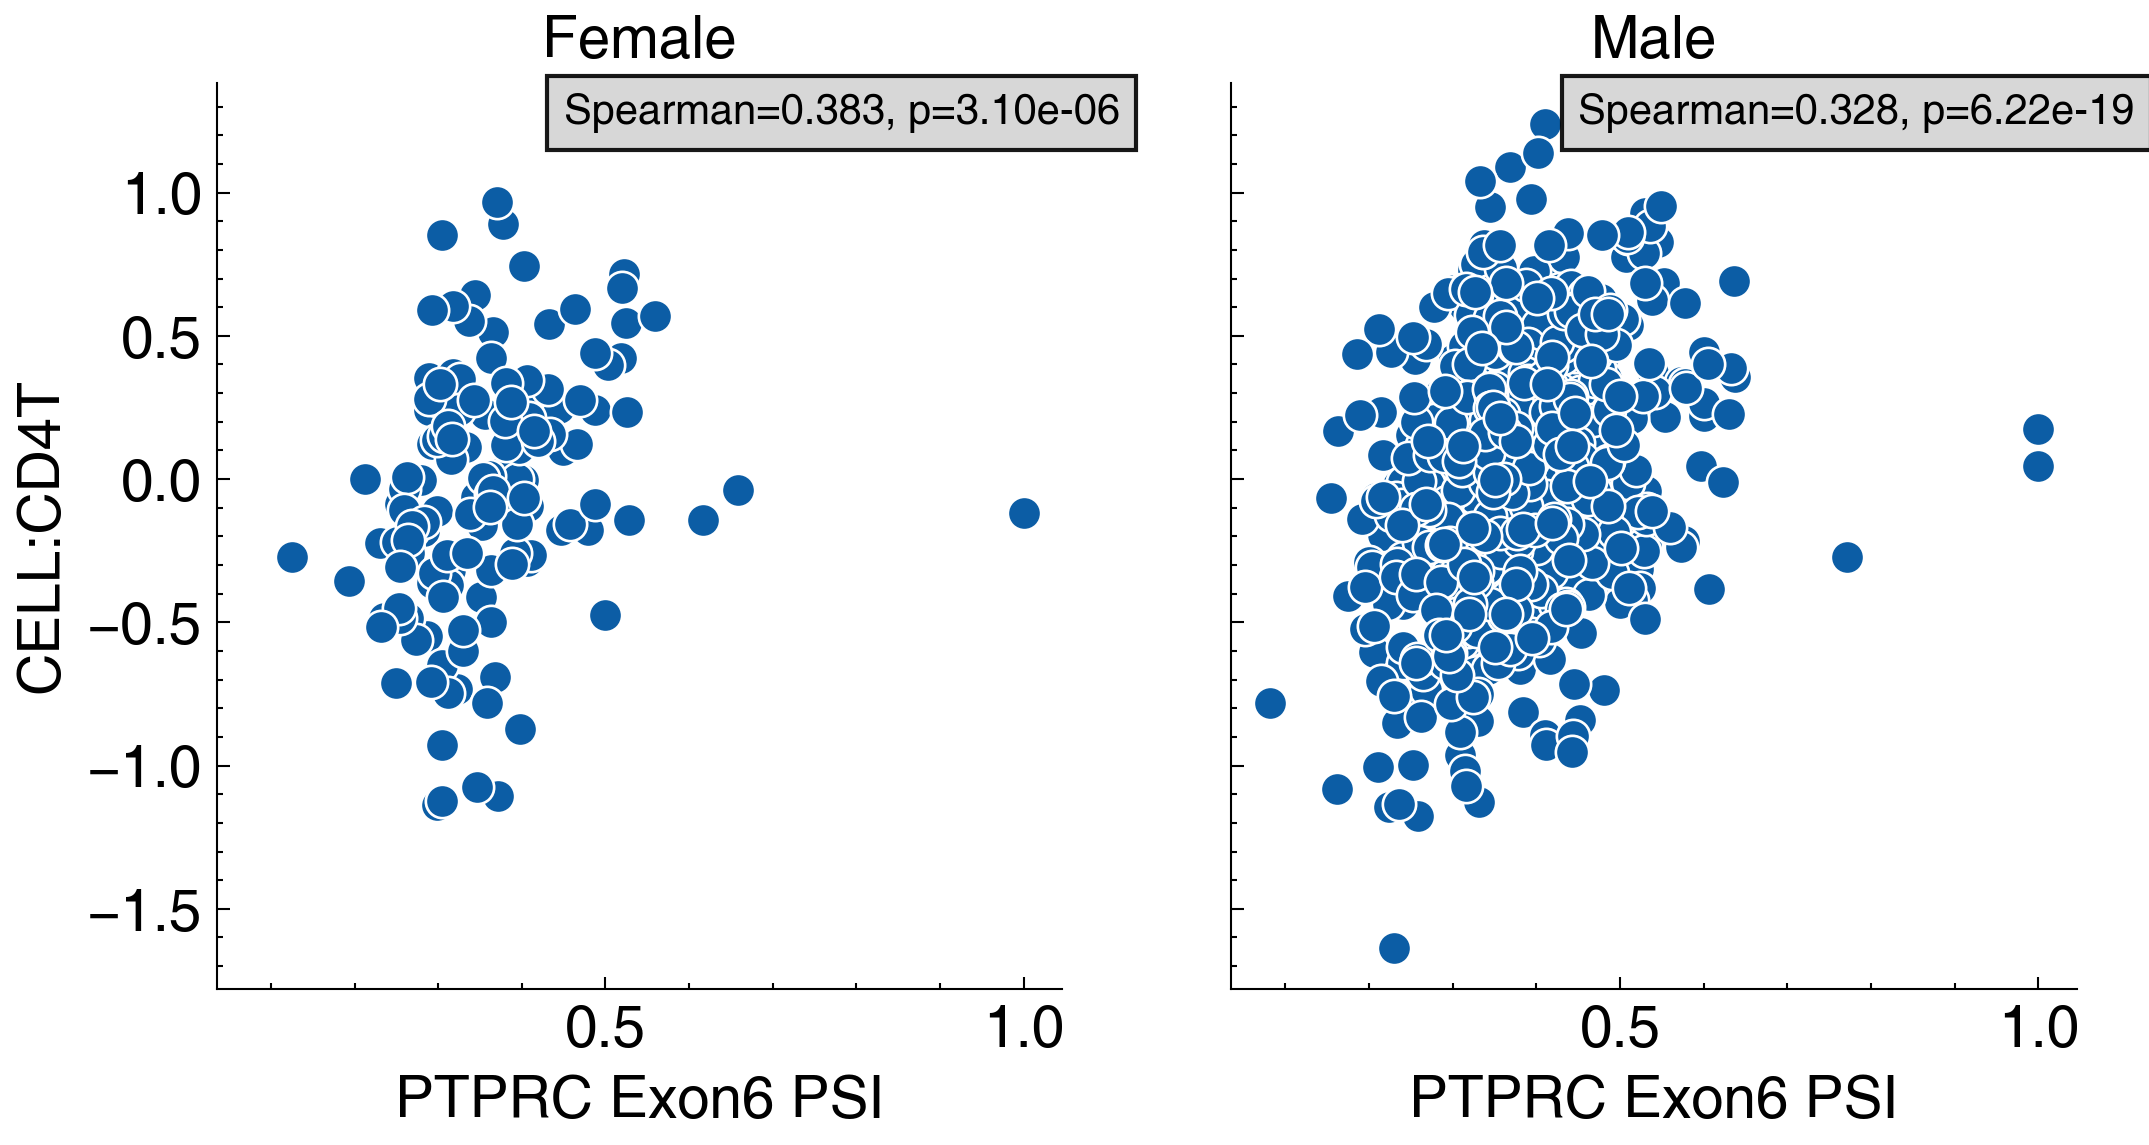

In [45]:
for target_lv in target_lvs:
    plier_psi_df = plier_tcell_df.join(psi_jct)
    plier_psi_df.rename(columns={'chr1:+:198699704:198702386:198702530:198703297': 'PTPRC_SE_jct'}, inplace=True)
    #plier_psi_df = plier_psi_df.query('PTPRC_SE_jct<1.0 and PTPRC_SE_jct>0.0')
    plier_psi_df.dropna(axis=0, inplace=True)
    mal_sp = ss.spearmanr(plier_psi_df.query('Sex=="M"')['PTPRC_SE_jct'], plier_psi_df.query('Sex=="M"')[target_lv])
    fem_sp = ss.spearmanr(plier_psi_df.query('Sex=="F"')['PTPRC_SE_jct'], plier_psi_df.query('Sex=="F"')[target_lv])

    fig, axs = plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)
    sns.scatterplot(x='PTPRC_SE_jct', y=target_lv,
                    data=plier_psi_df.query('Sex=="F"'), 
                    ax=axs[0]
              )
    text_y = plier_psi_df[target_lv].max() * 1
    axs[0].text(0.45, text_y, s='Spearman=%.3f, p=%.2e' % (fem_sp[0], fem_sp[1]), bbox=dict(facecolor='lightgrey', alpha=0.9))
    axs[0].set_xlabel('PTPRC Exon6 PSI')
    axs[0].set_ylabel(target_lv)
    axs[0].set_title('Female')

    sns.scatterplot(x='PTPRC_SE_jct', y=target_lv,
                    data=plier_psi_df.query('Sex=="M"'), 
                    ax=axs[1]
              )
    axs[1].text(0.45,text_y, s='Spearman=%.3f, p=%.2e' % (mal_sp[0], mal_sp[1]), bbox=dict(facecolor='lightgrey', alpha=0.9))
    axs[1].set_xlabel('PTPRC Exon6 PSI')
    #axs[1].set_ylabel('PLIER CD8T')
    axs[1].set_title('Male')
    #axs[1].set_xlim(0.05, 0.7)

    fig.savefig('%s/all_genes_splicing.gender/figs/05-PLIER_%s-vs-PTPRC_PSI.pdf' % (DATA_VER, target_lv))

In [35]:
print("FINISH:", datetime.now())

FINISH: 2021-08-24 12:55:46.369287
